<a href="https://colab.research.google.com/github/starkgit91/Binary-Classification-using-LogisticRegression/blob/main/Binary_Classification_using_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download the dataset (be sure to upload your Kaggle.json API token!)

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open creditcardfraud.zip, creditcardfraud.zip.zip or creditcardfraud.zip.ZIP.


In [ ]:
# Load the dataset

import pandas as pd

df = pd.read_csv('creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Observe class imbalance

df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# Shuffle the dataset

df = df.sample(frac=1, random_state=1)
df = df.reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,0.070050,-0.854023,0.547347,0.616448,-0.101785,-0.608492,-0.288559,-0.606199,-0.900746,-0.201311,-0.196039,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
1,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,-0.600684,0.096501,0.710309,0.778924,0.353867,0.953048,-0.103542,0.128899,-0.964070,-0.477130,-0.009041,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
2,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,-0.528357,-0.813214,0.111898,1.133875,-0.649766,0.861035,0.583787,-0.344094,0.028312,0.219760,0.206028,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
3,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,0.334853,0.905210,-0.277872,-1.336179,-0.012238,0.212828,0.769345,-1.010534,0.357288,-0.125585,0.315823,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
4,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,-0.696578,0.101512,-0.433200,-0.634867,-1.188354,1.028063,0.576121,1.068353,0.332690,-0.362811,-0.105286,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0


In [ ]:
# Create (X_train, y_train), (X_test, y_test)

as_np = df.to_numpy()

index = int(len(as_np) * .92)

X_train, y_train = as_np[:index, :-1], as_np[:index, -1]
X_test, y_test = as_np[index:, :-1], as_np[index:, -1]

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((262022, 30), (262022,)), ((22785, 30), (22785,)))

In [ ]:
# Preprocess the input matrices

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_test[:2]

array([[ 0.14097956,  0.53955733, -1.15153973, -0.47041404,  0.57191953,
        -0.85362208, -0.27419086, -0.03159233, -0.25697594,  2.43387034,
        -0.75622807, -0.03956163, -1.77401948,  2.41251471,  1.26340856,
        -0.24099657,  0.16722599,  0.24463032,  0.56588687, -0.53397987,
         1.02654979,  0.4423462 ,  0.47928779, -0.49696321, -0.14435544,
        -0.64466426,  0.08065479, -0.24695714,  0.11458447,  1.64640304],
       [ 0.671004  , -0.17870974,  0.61200314, -1.46701456, -1.07832074,
         2.09869282,  2.32026256,  0.1206093 ,  1.00162072, -0.32909453,
        -1.19386994,  0.08307262, -0.17088564, -0.29384832, -0.47517231,
         0.94467365,  0.35164934,  0.51565632,  0.7195823 , -0.94869002,
        -0.27942395,  0.43920839,  0.99645864, -0.31479867,  1.02631447,
         0.083005  , -0.34483488, -0.38849413, -0.05074221, -0.26100058],
       [-1.08144588,  0.43187514, -0.45445559,  0.62738647, -0.00984894,
        -0.26369254,  1.41072358, -0.80438694,  0

In [ ]:
# Fit Logistic Regression Model & get predictions on test set

from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)

test_predictions = model.predict(X_test)

test_predictions

array([0., 0., 0., ..., 0., 0., 0.])

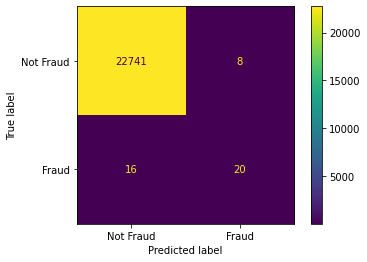

In [ ]:
# Display Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Fraud', 'Fraud'])
disp.plot()

✔️ $True$ $Negative$ = $Is$ $Negative$, $Predicted$ $Negative$

❌ $False$ $Positive$ = $Predicted$ $Positive$, $Is$ $Negative$

❌ $False$ $Negative$ = $Predicted$ $Negative$, $Is$ $Positive$

✔️ $True$ $Positive$ = $Is$ $Positive$, $Predicted$ $Positive$

In [ ]:
# Get TNs, FPs, FNs, TPs

tn, fp, fn, tp = cm.ravel()

s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)

print(s)


True Negatives: 22741
False Positives: 8
False Negatives: 16
True Positives: 20



$Accuracy$ =  $\frac{TP + TN}{TP + TN + FP + FN}$

In [ ]:
def accuracy(tn, fp, fn, tp):
  return (tp + tn) / (tp + tn + fp + fn)

"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))

'Accuracy: 0.9989466754443713'

$Recall$ = $Sensitivity$ = $True$ $Positive$ $Rate$ = $\frac{TP}{TP + FN}$

In [ ]:
def tpr(tn, fp, fn, tp):
  return tp / (tp + fn)

"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))

'True Positive Rate: 0.5555555555555556'

$False$ $Negative$ $Rate$ = $\frac{FN}{TP + FN}$

In [ ]:
def fnr(tn, fp, fn, tp):
  return fn / (tp + fn)

"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))

'False Negative Rate: 0.4444444444444444'

In [ ]:
"True Positive Rate + False Negative Rate: {0}".format(tpr(tn, fp, fn, tp) + fnr(tn, fp, fn, tp))

'True Positive Rate + False Negative Rate: 1.0'

$Specificity$ = $True$ $Negative$ $Rate$ = $\frac{TN}{TN + FP}$

In [ ]:
def tnr(tn, fp, fn, tp):
  return tn / (tn + fp)

"True Negative Rate: {0}".format(tnr(tn, fp, fn, tp))

'True Negative Rate: 0.9996483361906018'

$False$ $Positive$ $Rate$ = $\frac{FP}{TN + FP}$

In [ ]:
def fpr(tn, fp, fn, tp):
  return fp / (tn + fp)

"False Positive Rate: {0}".format(fpr(tn, fp, fn, tp))

'False Positive Rate: 0.00035166380939821533'

In [ ]:
"True Negative Rate + False Positive Rate: {0}".format(tnr(tn, fp, fn, tp) + fpr(tn, fp, fn, tp))

'True Negative Rate + False Positive Rate: 1.0'

$Precision$ = $Positive$ $Predictive$ $Value$ = $\frac{TP}{TP + FP}$

In [ ]:
def ppv(tn, fp, fn, tp):
  return tp / (tp + fp)

"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))

'Positive Predictive Value: 0.7142857142857143'

$Negative$ $Predictive$ $Value$ = $\frac{TN}{TN + FN}$

In [ ]:
def npv(tn, fp, fn, tp):
  return tn / (tn + fn)

"Negative Predictive Value: {0}".format(npv(tn, fp, fn, tp))

'Negative Predictive Value: 0.9992969196291251'

$Balanced$ $Accuracy$ = $\frac{(TPR + TNR)}{2}$

In [ ]:
def balanced_accuracy(tn, fp, fn, tp):
  tprr = tpr(tn, fp, fn, tp)
  tnrr = tnr(tn, fp, fn, tp)
  return (tprr + tnrr) / 2

"Balanced Accuracy: {0}".format(balanced_accuracy(tn, fp, fn, tp))

'Balanced Accuracy: 0.7776019458730787'

$F_1$ = $\frac{2*Precisicion*Recall}{Precision + Recall}$

In [ ]:
def f1(tn, fp, fn, tp):
  p = ppv(tn, fp, fn, tp)
  r = tpr(tn, fp, fn, tp)

  return (2*p*r) / (p + r)

"F1 Score: {0}".format(f1(tn, fp, fn, tp))

'F1 Score: 0.6250000000000001'

In [ ]:
# Get prediction probabilities

probabilities = model.predict_proba(X_test)[:, 1]

probabilities

In [ ]:
# Get predictions using normal threshold of 0.5

pd.value_counts(probabilities > 0.5)

False    22757
True        28
dtype: int64

In [ ]:
# Generate 2000 evenly-separated thresholds

import numpy as np

thresholds = np.linspace(0, 1, num=2000).astype(np.float16)

thresholds

array([0.000e+00, 5.002e-04, 1.000e-03, ..., 9.990e-01, 9.995e-01,
       1.000e+00], dtype=float16)

In [ ]:
# Get test predictions array for each threshold

all_predictions = np.array([(probabilities > t).astype(int) for t in thresholds])

all_predictions.shape

(2000, 22785)

In [ ]:
# Show distribution depending on threshold

pd.value_counts(all_predictions[0])

1    22785
dtype: int64

In [ ]:
# Get confusion matrices, true positive rates, and false positive rates for each threshold

confusion_matrices = [confusion_matrix(y_test, predictions) for predictions in all_predictions]
tn_fp_fn_tps = [cm.ravel() for cm in confusion_matrices]

tprs = [tpr(tn, fp, fn, tp) for tn, fp, fn, tp in tn_fp_fn_tps]
fprs = [fpr(tn, fp, fn, tp) for tn, fp, fn, tp in tn_fp_fn_tps]

In [ ]:
# Create Scatter Plot of ROC Curve

import plotly.express as px

px.scatter(x=fprs, y=tprs, color=thresholds, labels=dict(x='False Positive Rate', y='True Positive Rate', color='Threshold'), title='ROC Curve')

In [ ]:
# Report AUC

from sklearn.metrics import auc

auc(fprs, tprs)

0.9810064911278153

$Matthews$ $Correlation$ $Coefficient$ = $\frac{(TP * TN) - (FP * FN)}{\sqrt{(TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)}}$

In [ ]:
from math import sqrt

def mcc(tn, fp, fn, tp):
  top = (tp * tn) - (fp * fn)
  bot = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
  return top / sqrt(bot)

"Matthews Correlation Coefficient: {0}".format(mcc(tn, fp, fn, tp))

'Matthews Correlation Coefficient: 0.6294313746803477'

In Practice...

In [ ]:
# Need actuals, predictions, and prediction probabilities

y_test.shape, test_predictions.shape, probabilities.shape

((22785,), (22785,), (22785,))

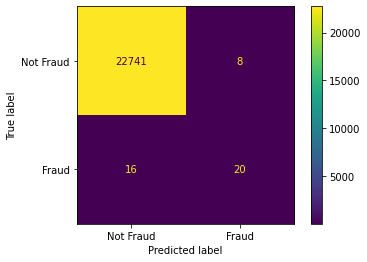

In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Fraud', 'Fraud'])
disp.plot()

In [ ]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, test_predictions, labels=[0, 1], target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22749
       Fraud       0.71      0.56      0.63        36

    accuracy                           1.00     22785
   macro avg       0.86      0.78      0.81     22785
weighted avg       1.00      1.00      1.00     22785



In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, test_predictions)

0.6294313746803477

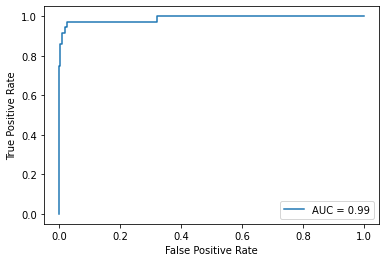

In [ ]:
# ROC & AUC

from sklearn.metrics import RocCurveDisplay, roc_curve

fprs, tprs, thresholdss = roc_curve(y_test, probabilities)
roc_auc = auc(fprs, tprs)
display = RocCurveDisplay(fpr=fprs, tpr=tprs, roc_auc=roc_auc)
display.plot()